In [12]:
import pandas as pd
import tskit
ts = pd.read_pickle(r'./map_tree_r3.pickle')

In [13]:
list1 = list(range(6,112))
list2 = list(range(0,6))
new_index = list1 + list2

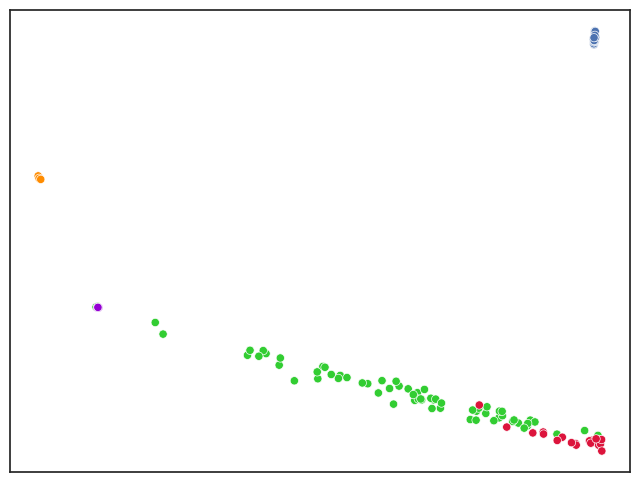

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import pandas as pd
from samples_dict import samples_dict

##### PCA summary stats #####
genotype = ts.genotype_matrix()

# minor allele frequency filter NOT NEEDED
'''
frequency = np.count_nonzero(genotype == 1, axis=1) / np.shape(genotype)[1]

maf = np.zeros(np.shape(frequency)[0])

for num in range(0, np.shape(frequency)[0]):
    maf[num] = np.any([frequency[num] < 0.05, frequency[num] > 0.95])

maf = maf.astype(dtype=bool)
filtered_01 = genotype[~maf]
'''

# convert from 01 to 012
samples = np.shape(genotype)[1]
ones = []
twos = []

for col in range(0, samples):
    if col % 2 == 0:
        ones.append(col)
    else:
        twos.append(col)

matrix_012 = np.add(genotype[:, ones], genotype[:, twos])

# scaled PCA

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

PCA_sim = pipeline.fit_transform(matrix_012.T)

pca_df = pd.DataFrame(PCA_sim, columns=['pc1', 'pc2', 'pc3'])
pca_df = pca_df.reindex(new_index)

pops = ["Scottish Wildcat"]*65 + ["Scottish Captive"]*22 + ["European Wildcat"]*15 + ["African Wildcat"]*4 + ["Domestic cat"]*6
pca_df["Population"] = pops

#sns.set(rc={'figure.figsize':(1,1)})
sns.set_style(style='white')

palette = ["limegreen", "crimson", "b", "darkorange", "darkviolet"]

ax = sns.scatterplot(pca_df, x=pca_df["pc1"], y=pca_df["pc2"], hue=pca_df["Population"], palette = palette)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=15, title=None)

ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.legend([], [], frameon=False)

In [5]:
ts_ob = pd.read_pickle(r'./tsinfer_tree.pickle')

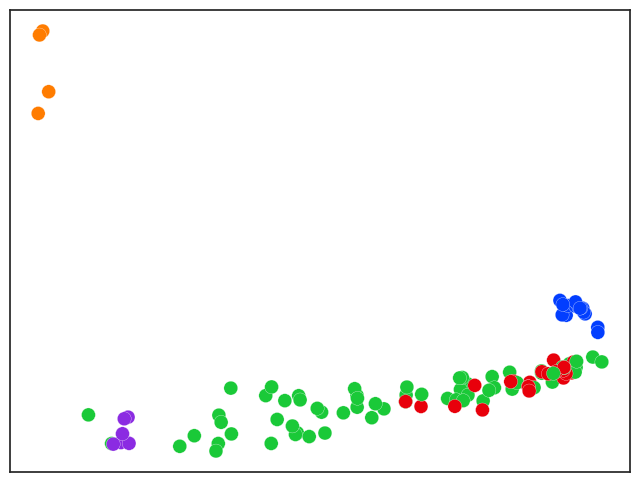

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import pandas as pd
from samples_dict import samples_dict

##### PCA summary stats #####
genotype = ts_ob.genotype_matrix()

# minor allele frequency filter NOT NEEDED
'''
frequency = np.count_nonzero(genotype == 1, axis=1) / np.shape(genotype)[1]

maf = np.zeros(np.shape(frequency)[0])

for num in range(0, np.shape(frequency)[0]):
    maf[num] = np.any([frequency[num] < 0.05, frequency[num] > 0.95])

maf = maf.astype(dtype=bool)
filtered_01 = genotype[~maf]
'''

# convert from 01 to 012
samples = np.shape(genotype)[1]
ones = []
twos = []

for col in range(0, samples):
    if col % 2 == 0:
        ones.append(col)
    else:
        twos.append(col)

matrix_012 = np.add(genotype[:, ones], genotype[:, twos])

# scaled PCA

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

PCA_ob = pipeline.fit_transform(matrix_012.T)

pca_df = pd.DataFrame(PCA_ob, columns=['pc1', 'pc2', 'pc3'])
pops = samples_dict.values()
pca_df["pop"] = pops

sns.set(rc={'figure.figsize':(8,6)})
sns.set_style(style='white')

ax = sns.scatterplot(pca_df, x=pca_df["pc1"], y=pca_df["pc2"], hue=pca_df["pop"], palette = "bright", s=100, linewidth=0.2)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.legend([], [], frameon=False)

In [39]:
import numpy as np
from scipy.spatial import procrustes

mtx1, mtx2, disparity = procrustes(PCA_ob, PCA_sim)

In [40]:
disparity

0.7921952420142395

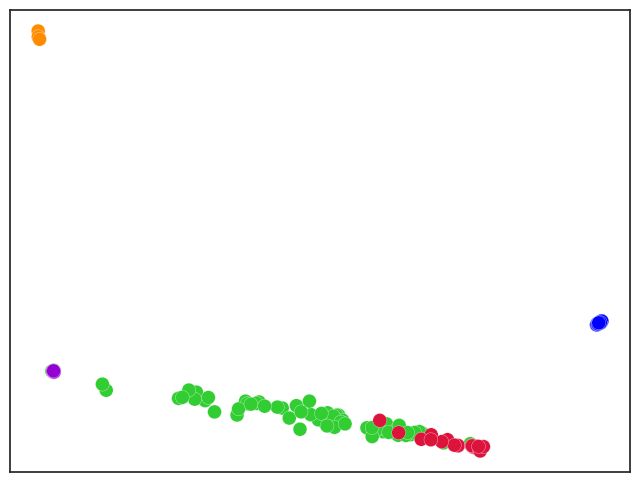

In [41]:
pca_df = pd.DataFrame(mtx2, columns=['pc1', 'pc2', 'pc3'])
pca_df = pca_df.reindex(new_index)

pops = ["Scottish Wildcat"]*65 + ["Scottish Captive"]*22 + ["European Wildcat"]*15 + ["African Wildcat"]*4 + ["Domestic"]*6
pca_df["Population"] = pops

sns.set(rc={'figure.figsize':(8,6)})
sns.set_style(style='white')

ax = sns.scatterplot(pca_df, x=pca_df["pc1"], y=pca_df["pc2"], hue=pca_df["Population"], palette = ["limegreen", "crimson", "blue", "darkorange", "darkviolet"], s=100, linewidth=0.2)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=15)

ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.legend([], [], frameon=False)

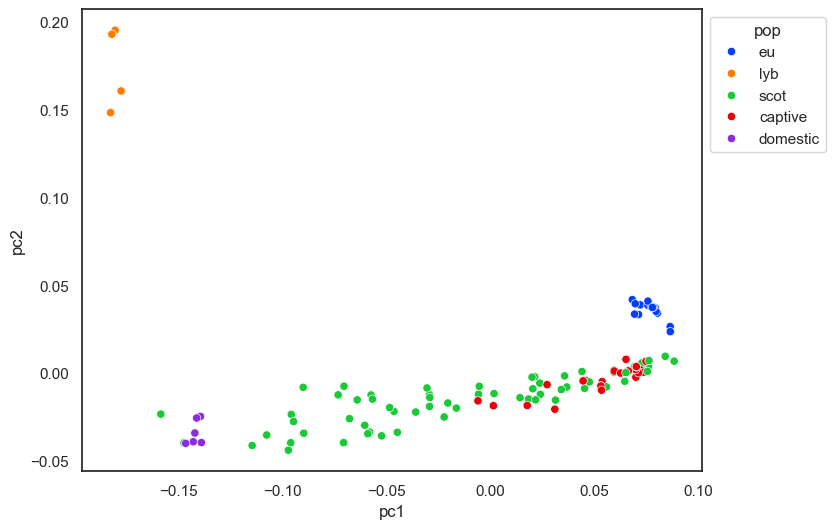

In [42]:
pca_df = pd.DataFrame(mtx1, columns=['pc1', 'pc2', 'pc3'])
pops = samples_dict.values()
pca_df["pop"] = pops

ax = sns.scatterplot(pca_df, x=pca_df["pc1"], y=pca_df["pc2"], hue=pca_df["pop"], palette = "bright")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))